In [10]:
from json.decoder import NaN

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from duckdb.experimental.spark.sql.functions import like
from skimpy import skim


In [11]:
data = pd.read_csv('../data/marketing_realistic_no_leakage_48000.csv')

In [12]:
data.head()

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8001,26,Female,53664,Affiliate,Consideration,1820.99,0.1901,0.0172,18,9.0,6.33,35,14,0,5,3390,LinkedIn,Hootsuite,0
1,8002,26,Female,23671,Social Media,Retention,1785.04,0.0000,0.0344,36,10.0,0.48,22,13,0,0,68,Instagram,MailChimp,0
2,8003,51,Male,25799,SEO,Awareness,1775.15,0.0539,0.0227,22,11.0,3.22,4,6,0,0,564,LinkedIn,HubSpot,0
3,8004,26,Female,56751,PPC,Awareness,1711.18,0.0958,0.0057,33,7.0,10.52,54,20,6,0,416,Instagram,MailChimp,0
4,8005,28,Female,26553,Email,Conversion,1760.34,0.2466,0.0580,34,9.0,0.34,57,0,0,0,60,Facebook,SEMrush,0


In [13]:
data.shape

(48000, 20)

There are 48000 rows and 20 columns in our data.

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48000 entries, 0 to 47999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           48000 non-null  int64  
 1   Age                  48000 non-null  int64  
 2   Gender               48000 non-null  object 
 3   Income               48000 non-null  int64  
 4   CampaignChannel      48000 non-null  object 
 5   CampaignType         48000 non-null  object 
 6   AdSpend              48000 non-null  float64
 7   ClickThroughRate     45536 non-null  float64
 8   ConversionRate       48000 non-null  float64
 9   WebsiteVisits        48000 non-null  int64  
 10  PagesPerVisit        45565 non-null  float64
 11  TimeOnSite           48000 non-null  float64
 12  SocialShares         48000 non-null  int64  
 13  EmailOpens           48000 non-null  int64  
 14  EmailClicks          48000 non-null  int64  
 15  PreviousPurchases    48000 non-null 

##### **Discrete Numerical Variables:** // Integers, Countable Variables
* Age
* WebSiteVisits
* SocialShares
* EmailOpens
* EmailClicks
* PreviousPurchases
* Conversion(Target)

##### **Continous Numerical Variables:** // Floats, Measurable Variables
* Income
* Adspend
* ConversionRate
* ClickThroughRate
* PagesPerVisit
* TimeOnSite
* LoyaltyPoints

##### **Categorical Variables:**
* Gender
* CampaignType
* CampaignChannel
* AdvertisingPlatform
* AdvertisingTool



There are 14 numerical, 5 categorical columns.

In [15]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,48000.0,32000.500000,13856.550797,8001.000,20000.7500,32000.5000,44000.250000,56000.00
Age,48000.0,38.494312,10.660066,22.000,29.0000,37.0000,48.000000,58.00
Income,48000.0,37524.015854,9660.362687,23156.000,29071.0000,36249.0000,45391.250000,56953.00
AdSpend,48000.0,1510.407752,456.997208,548.440,1134.9900,1510.3000,1882.682500,2550.04
ClickThroughRate,45536.0,0.079728,0.081340,0.000,0.0087,0.0494,0.135925,0.28
ConversionRate,48000.0,0.031362,0.017478,0.005,0.0177,0.0276,0.042600,0.08
WebsiteVisits,48000.0,19.979250,11.269493,1.000,10.0000,20.0000,30.000000,39.00
PagesPerVisit,45565.0,6.500757,2.870746,2.000,4.0000,6.0000,9.000000,11.00
TimeOnSite,48000.0,6.973006,4.020781,0.000,3.4975,6.9600,10.450000,14.00
SocialShares,48000.0,29.372396,17.256018,0.000,14.0000,29.0000,44.000000,59.00


In [1]:
skim(data)

NameError: name 'skim' is not defined

From this we can say basic analysis like:
1. [x] Age columns ranges between 18-69
2. [x] AVG Income of peoples in this data $84,664

3. [x] LoyaltPoints range between 0-5000
4. [x] Conversion is either 1-0
5. [x] Amount spend on advertisements ranges between $100-10000

In [17]:
print(f"Total duplicate rows : {data.duplicated().sum()}")

Total duplicate rows : 0


In [18]:
data.isna().sum()

CustomerID                0
Age                       0
Gender                    0
Income                    0
CampaignChannel           0
CampaignType              0
AdSpend                   0
ClickThroughRate       2464
ConversionRate            0
WebsiteVisits             0
PagesPerVisit          2435
TimeOnSite                0
SocialShares              0
EmailOpens                0
EmailClicks               0
PreviousPurchases         0
LoyaltyPoints             0
AdvertisingPlatform       0
AdvertisingTool           0
Conversion                0
dtype: int64

In [19]:
data['ClickThroughRate'].mean()

np.float64(0.07972804374560787)

In [20]:
data[data['ClickThroughRate'].isna()]

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
11,8012,54,Male,28167,Social Media,Consideration,1452.72,NaN,0.0190,5,6.0,11.63,54,10,2,2,1138,YouTube,Google Ads,0
15,8016,49,Male,29732,Affiliate,Conversion,1599.44,NaN,0.0666,29,5.0,10.51,30,5,1,0,183,Instagram,MailChimp,0
16,8017,23,Female,25388,SEO,Awareness,845.58,NaN,0.0150,2,9.0,3.27,17,17,5,0,579,LinkedIn,Meta Ads Manager,0
81,8082,47,Male,36437,Email,Conversion,1226.81,NaN,0.0514,34,5.0,1.35,45,9,2,0,349,Twitter,Google Ads,0
115,8116,37,Male,27913,PPC,Consideration,756.53,NaN,0.0418,35,10.0,3.12,9,12,0,0,107,YouTube,SEMrush,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47927,55928,35,Female,24172,PPC,Awareness,1247.99,NaN,0.0157,12,2.0,3.21,54,6,1,5,3163,Facebook,HubSpot,0
47940,55941,50,Female,49119,PPC,Conversion,1077.82,NaN,0.0466,33,8.0,10.17,14,1,0,4,2523,Twitter,Meta Ads Manager,1
47944,55945,28,Male,25762,Social Media,Consideration,1485.69,NaN,0.0289,1,2.0,12.10,1,12,2,0,220,Instagram,Google Ads,0
47947,55948,42,Male,32370,Email,Retention,1810.32,NaN,0.0274,24,9.0,6.83,44,15,5,0,572,Twitter,MailChimp,0


In [21]:
data[data['PagesPerVisit'].isna()]

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
20,8021,53,Female,42074,Email,Retention,1168.98,0.0582,0.0267,24,NaN,1.09,46,4,1,0,352,TikTok,Hootsuite,0
36,8037,42,Female,23293,Referral,Consideration,1802.80,0.0532,0.0335,26,NaN,11.80,8,0,0,0,325,TikTok,HubSpot,0
39,8040,56,Male,29042,PPC,Consideration,1482.53,0.0836,0.0163,7,NaN,3.55,26,12,0,0,365,Instagram,SEMrush,0
71,8072,45,Male,40131,Social Media,Conversion,2046.62,0.0027,0.0640,1,NaN,1.74,26,1,0,0,526,LinkedIn,HubSpot,0
75,8076,23,Male,35363,Display,Awareness,976.62,0.0007,0.0228,9,NaN,7.27,48,13,3,0,518,Google,HubSpot,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47872,55873,32,Male,40674,Social Media,Awareness,1152.40,0.0048,0.0197,31,NaN,0.40,8,8,2,2,1394,Twitter,Google Ads,0
47907,55908,29,Female,33285,SEO,Retention,1662.44,0.0124,0.0227,39,NaN,8.02,46,3,0,0,397,Google,SEMrush,0
47923,55924,33,Female,33775,Social Media,Awareness,1254.91,0.0665,0.0216,12,NaN,1.71,46,7,2,2,2202,Instagram,Hootsuite,0
47954,55955,58,Female,50623,Email,Consideration,1932.02,NaN,0.0132,30,NaN,7.96,10,20,1,0,165,LinkedIn,MailChimp,0


In [22]:
# 1. PagesPerVisit için: Reklam Platformuna göre medyan değerini ata
data['PagesPerVisit'] = data['PagesPerVisit'].fillna(
    data.groupby('AdvertisingPlatform')['PagesPerVisit'].transform('median')
)

In [23]:
# 2. ClickThroughRate için: Kampanya Kanalına göre medyan değerini ata
data['ClickThroughRate'] = data['ClickThroughRate'].fillna(
    data.groupby('CampaignChannel')['ClickThroughRate'].transform('median')
)

In [24]:
data.isna().sum()

CustomerID             0
Age                    0
Gender                 0
Income                 0
CampaignChannel        0
CampaignType           0
AdSpend                0
ClickThroughRate       0
ConversionRate         0
WebsiteVisits          0
PagesPerVisit          0
TimeOnSite             0
SocialShares           0
EmailOpens             0
EmailClicks            0
PreviousPurchases      0
LoyaltyPoints          0
AdvertisingPlatform    0
AdvertisingTool        0
Conversion             0
dtype: int64

##### Identifying Unique Values From The Categorical Colums in Data

In [25]:
categorical_vars = data.select_dtypes(include='object').columns

for column in categorical_vars:
    unique_values = data[column].unique()
    print(f"{column} : {unique_values}\n")

Gender : ['Female' 'Male']

CampaignChannel : ['Affiliate' 'Social Media' 'SEO' 'PPC' 'Email' 'Display' 'Referral']

CampaignType : ['Consideration' 'Retention' 'Awareness' 'Conversion']

AdvertisingPlatform : ['LinkedIn' 'Instagram' 'Facebook' 'Twitter' 'Google' 'YouTube' 'TikTok']

AdvertisingTool : ['Hootsuite' 'MailChimp' 'HubSpot' 'SEMrush' 'Google Ads'
 'Meta Ads Manager']



We can drop CustomerID column.


In [26]:
data.tail()

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
47995,55996,44,Female,49152,SEO,Retention,1152.60,0.0161,0.0289,36,3.0,7.76,51,10,0,0,581,TikTok,HubSpot,0
47996,55997,50,Male,23413,SEO,Conversion,1689.87,0.0237,0.0298,26,11.0,10.93,41,21,7,0,172,Instagram,SEMrush,0
47997,55998,51,Female,54429,Social Media,Conversion,1652.01,0.0026,0.0423,33,7.0,4.51,31,21,2,0,7,TikTok,Hootsuite,0
47998,55999,50,Female,40910,Social Media,Consideration,1070.66,0.0000,0.0201,31,10.0,11.83,59,15,4,4,2307,Facebook,Google Ads,0
47999,56000,29,Male,36875,Social Media,Awareness,2073.33,0.2199,0.0088,15,8.0,12.46,35,6,1,2,1784,Google,Meta Ads Manager,0


##### Observing Outlier Values From Numerical Columns in Data

In [27]:
def plot_boxplots(data, numerical_cols, n_cols=3):
    """Sayısal değişkenler için box-plot grafikleri oluşturur.
    Aykırı değerlerin (outliers) görsel olarak saptanmasını sağlar.


    :param data : Veri çerçevesi (pd.DataFrame).
    :param numerical_cols : Box-plot çizilecek sayısal sütun isimleri listesi (list).
    :param n_cols : Yan yana kaç grafik gösterileceği (int).(default = 3)
    :return:
    """
    # Style: Arka plan bembeyaz,ızgara yok.
    sns.set_style('white')

    n_rows = (len(numerical_cols) + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize = (25, 5* n_rows))
    axes = axes.flatten()

    for i,col in enumerate(numerical_cols):
        sns.boxplot(ax = axes[i],
                    x=data[col],
                    color = 'skyblue',
                    linewidth=1.5,
                    whiskerprops=dict(color = '#1D3557', linewidth = 1.5),
        )

        axes[i].set_title(f'{col} - Outlier Analysis', fontsize = 12)
        axes[i].set_xlabel('')

    # Boş kalan subplotları temizle.
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

In [28]:
numeric_cols = data.select_dtypes(include=['int64','float64']).columns
numeric_cols = numeric_cols.drop(['Conversion'])

In [29]:
numeric_cols

Index(['CustomerID', 'Age', 'Income', 'AdSpend', 'ClickThroughRate',
       'ConversionRate', 'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite',
       'SocialShares', 'EmailOpens', 'EmailClicks', 'PreviousPurchases',
       'LoyaltyPoints'],
      dtype='object')

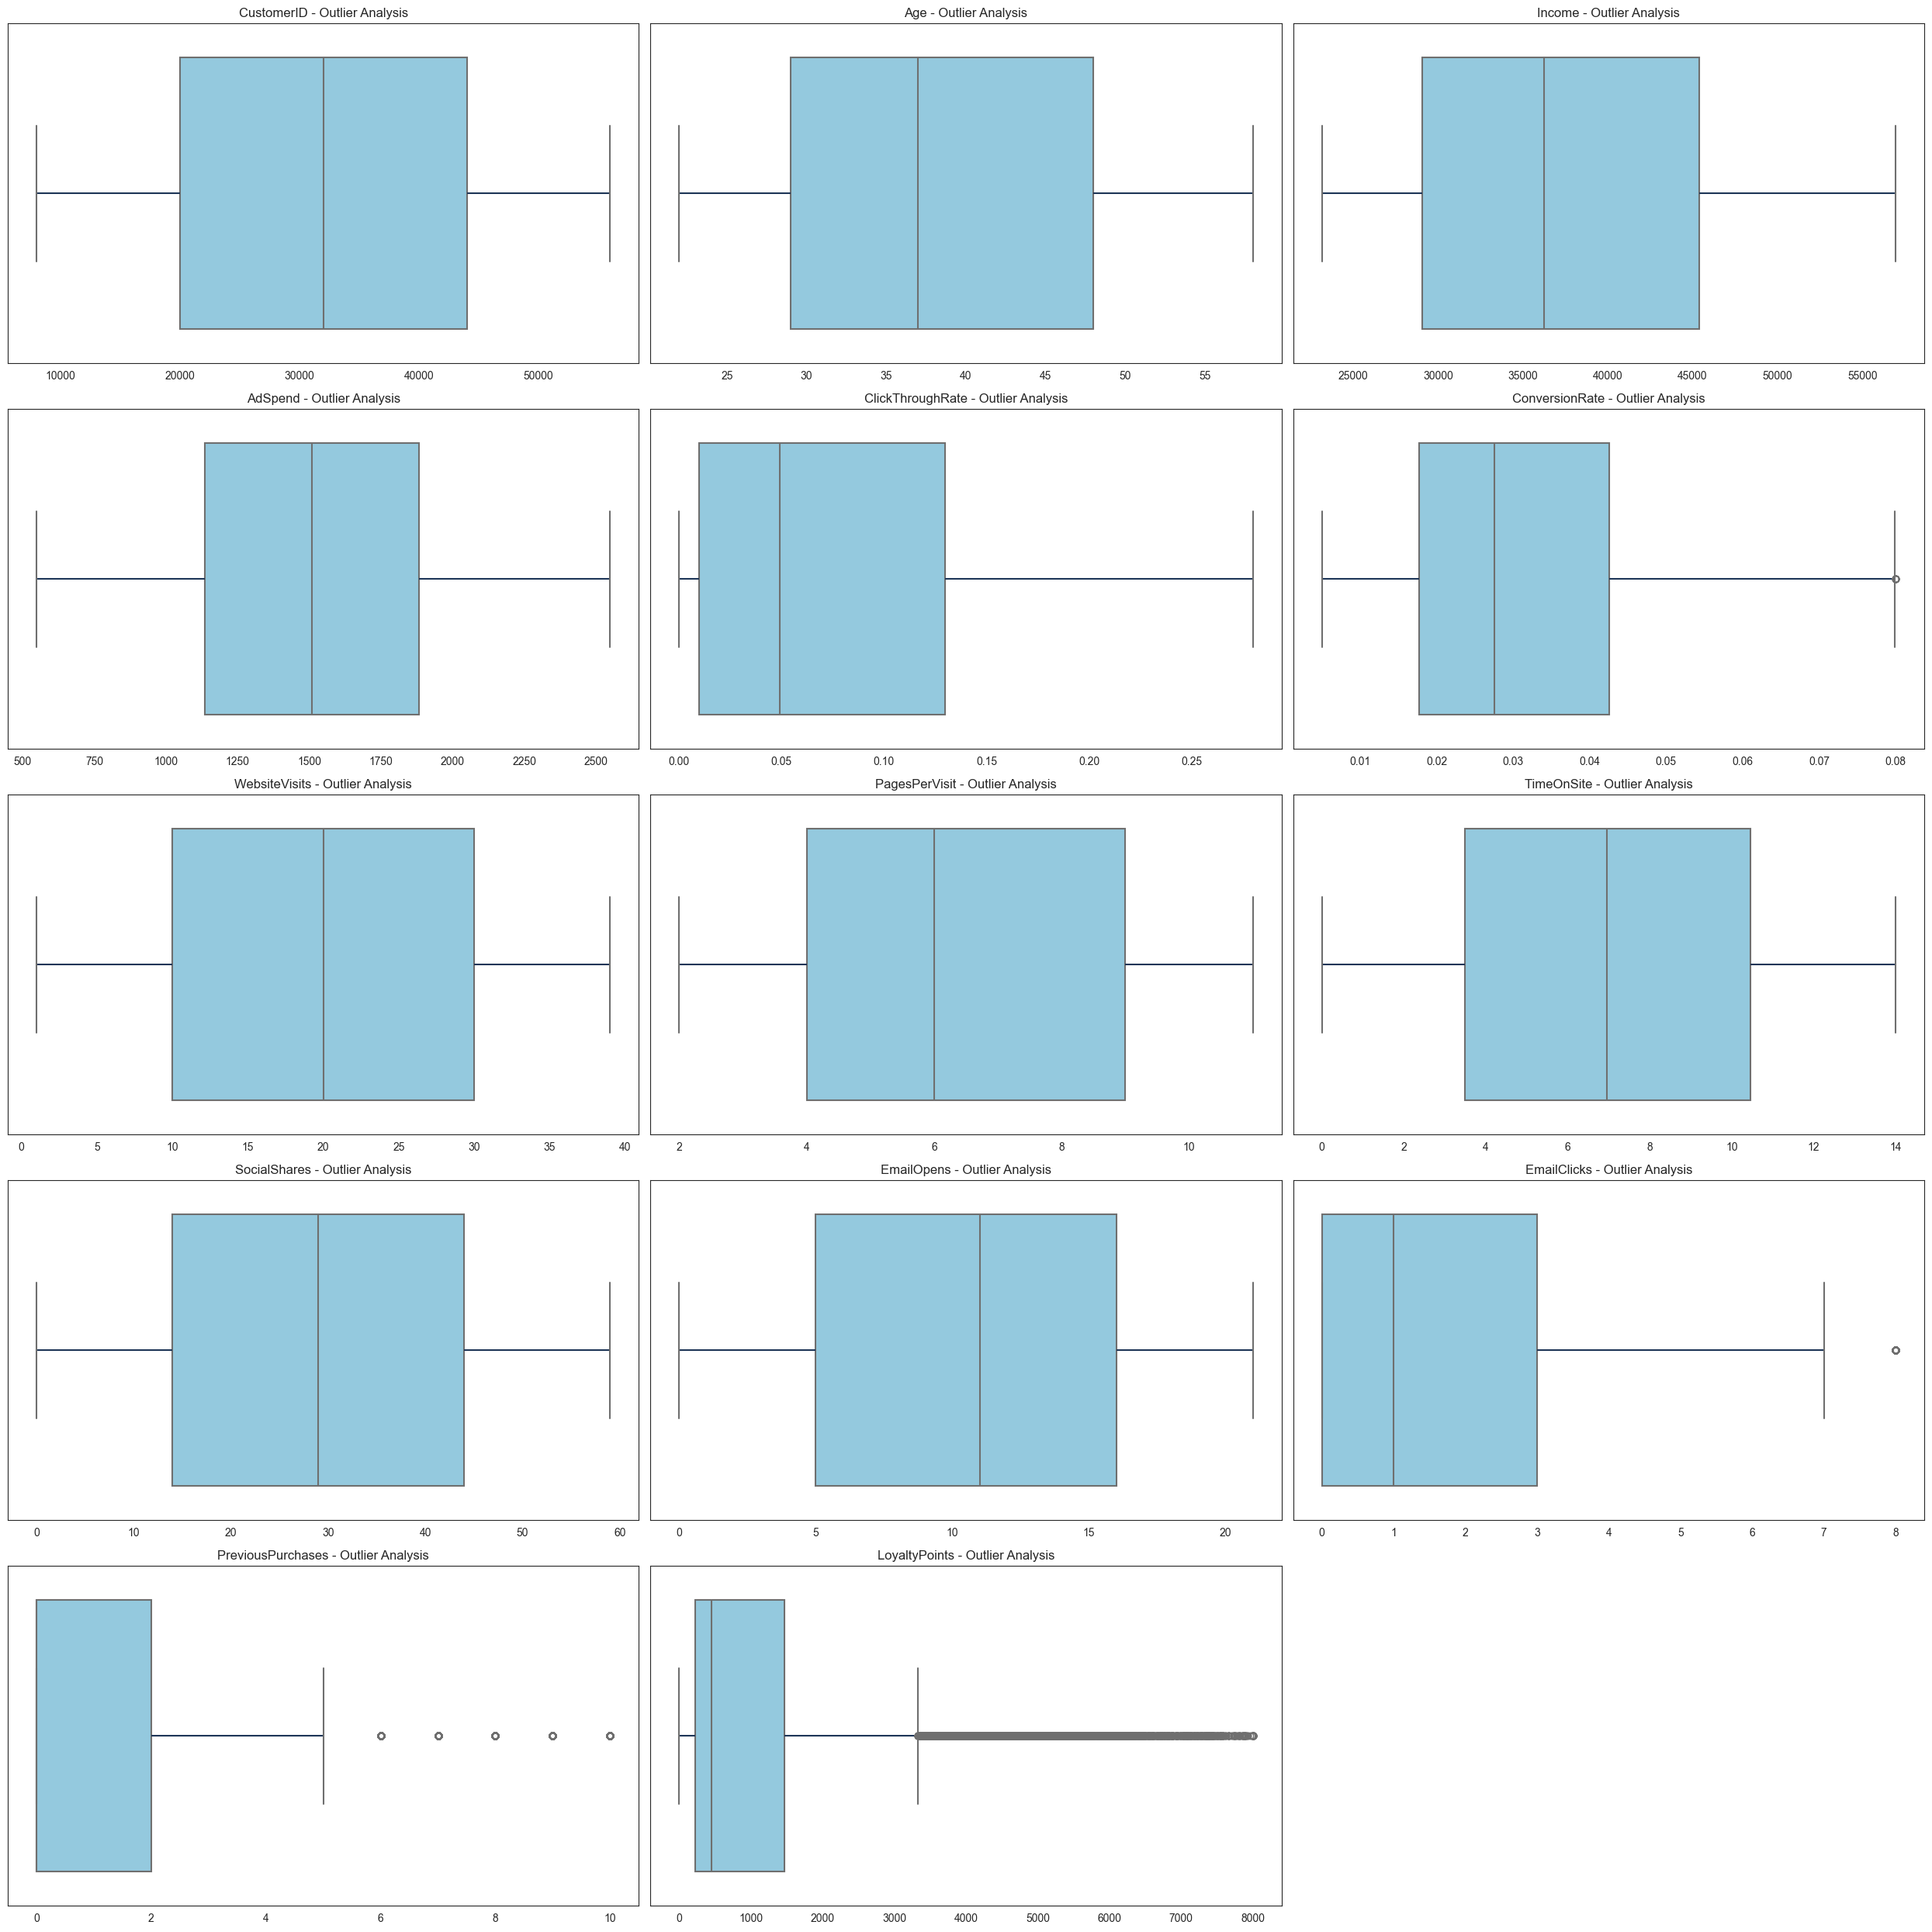

In [30]:
plot_boxplots(data, numeric_cols)

### **Outlier Analysis**
* ##### Age:
    The distrubition is close to a bell curve (normal). There are very few outliers, and they are within expected limits. We don't see any extreme values that would disrupt the data integrity.
* ##### Income & Adspend:
    There is a clear right-skewed distribution. The points at the top of the box-plot show that a small group of "high-income and big spenders" stands out as statistical outliers.
* ##### ClickThroughRate & ConversionRate:
    Most values are concentrated near the lower and upper boundaries. Values very close to 0 or 1 represent unusual behaviors compared to the general trend.
* ##### PaigesPerVisit & WebsiteVisits:
    Most users are at the lower end of the scale. However, isolated high values in the Rug-plot show that 'hyper-active' users appear as outliers in the system.
* ##### TimeOnSite:
    We can see a bimodal (two-peak) density. The large gap between "quick visitors" and "loyal users" pushes the values at the far ends into the outlier category.
* ##### Engagement (SocialShares, EmailClicks/Opens):
    Most people have low interaction levels. A few points at the top indicate a small but "super-interactive" group of users.
* ##### PreviousPurchases:
    "Super-loyal" customers with a high number of purchases stay outside the box-plot whiskers and are defined as statistical outliers.
* ##### LoyaltyPoints:
    The distribution is very balanced and uniform. Since the data is spread equally across a wide range, we do not see any significant outliers (fliers) on the box-plot.


In [31]:
def plot_quantile_distributions(data, numerical_columns, n_cols=3):
    """Sayısal değişkenlerin dağılımını merkezi eğilim ve kuantillerle görselleştirir.

    Histogram, KDE ve Rugplot kullanarak verinin yoğunluğunu gösterir;
    ortalama ve çeyreklik dilimleri dikey çizgilerle işaretler.

    Args:
        data (pd.DataFrame): Analiz edilecek veri seti.
        numerical_columns (list): Görselleştirilecek sayısal sütunların listesi.
        n_cols (int): Yan yana gösterilecek grafik sayısı. Varsayılan: 3.
    """
    # 1. Satır sayısını hesaplayalım (Matematiksel Tavan Fonksiyonu: ceil(toplam / sütun))
    n_rows = (len(numerical_columns) + n_cols - 1) // n_cols

    # 2. Şekil ve eksenleri oluşturalım
    sns.set_style("white")
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 6 * n_rows))

    # Eksenleri tek boyutlu diziye çevirelim (indeksle kolay erişim için)
    axes = axes.flatten()

    for i, col in enumerate(numerical_columns):
        # Mevcut ekseni seçelim
        ax = axes[i]

        # İstatistiksel hesaplamalar
        q1, q2, q3 = data[col].quantile([0.25, 0.50, 0.75])
        mu = data[col].mean()

        # Çizimler
        sns.histplot(data[col], stat='density', fill=False, ax=ax, color='gray', alpha=0.3)
        sns.kdeplot(data[col], fill=True, ax=ax, color='blue', alpha=0.2)
        sns.rugplot(data[col], ax=ax, color='gray', alpha=0.5)

        # Dikey çizgiler ve etiketler
        ax.axvline(mu, linestyle="--", color="r", label=f"Mean: {mu:.2f}")
        ax.axvline(q1, linestyle="--", color="black", label=f"Q1: {q1:.2f}")
        ax.axvline(q2, linestyle="--", color="black", label=f"Q2: {q2:.2f}")
        ax.axvline(q3, linestyle="--", color="black", label=f"Q3: {q3:.2f}")

        # Estetik ayarlar
        ax.set_title(f"Distribution of {col}", fontsize=13, fontweight='bold')
        ax.set_xlabel("")
        ax.legend(fontsize=9)
        sns.despine(ax=ax) # Kenarlıkları temizler

    # 3. Eğer boş kalan subplot varsa (Örn: 5 grafik, 2x3 düzen) onları gizle
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

# Kullanım:
# numerical_features = ["Age", "PagesPerVisit", "TimeOnSite", "LoyaltyPoints"]
# plot_quantile_distributions(data, numerical_features)

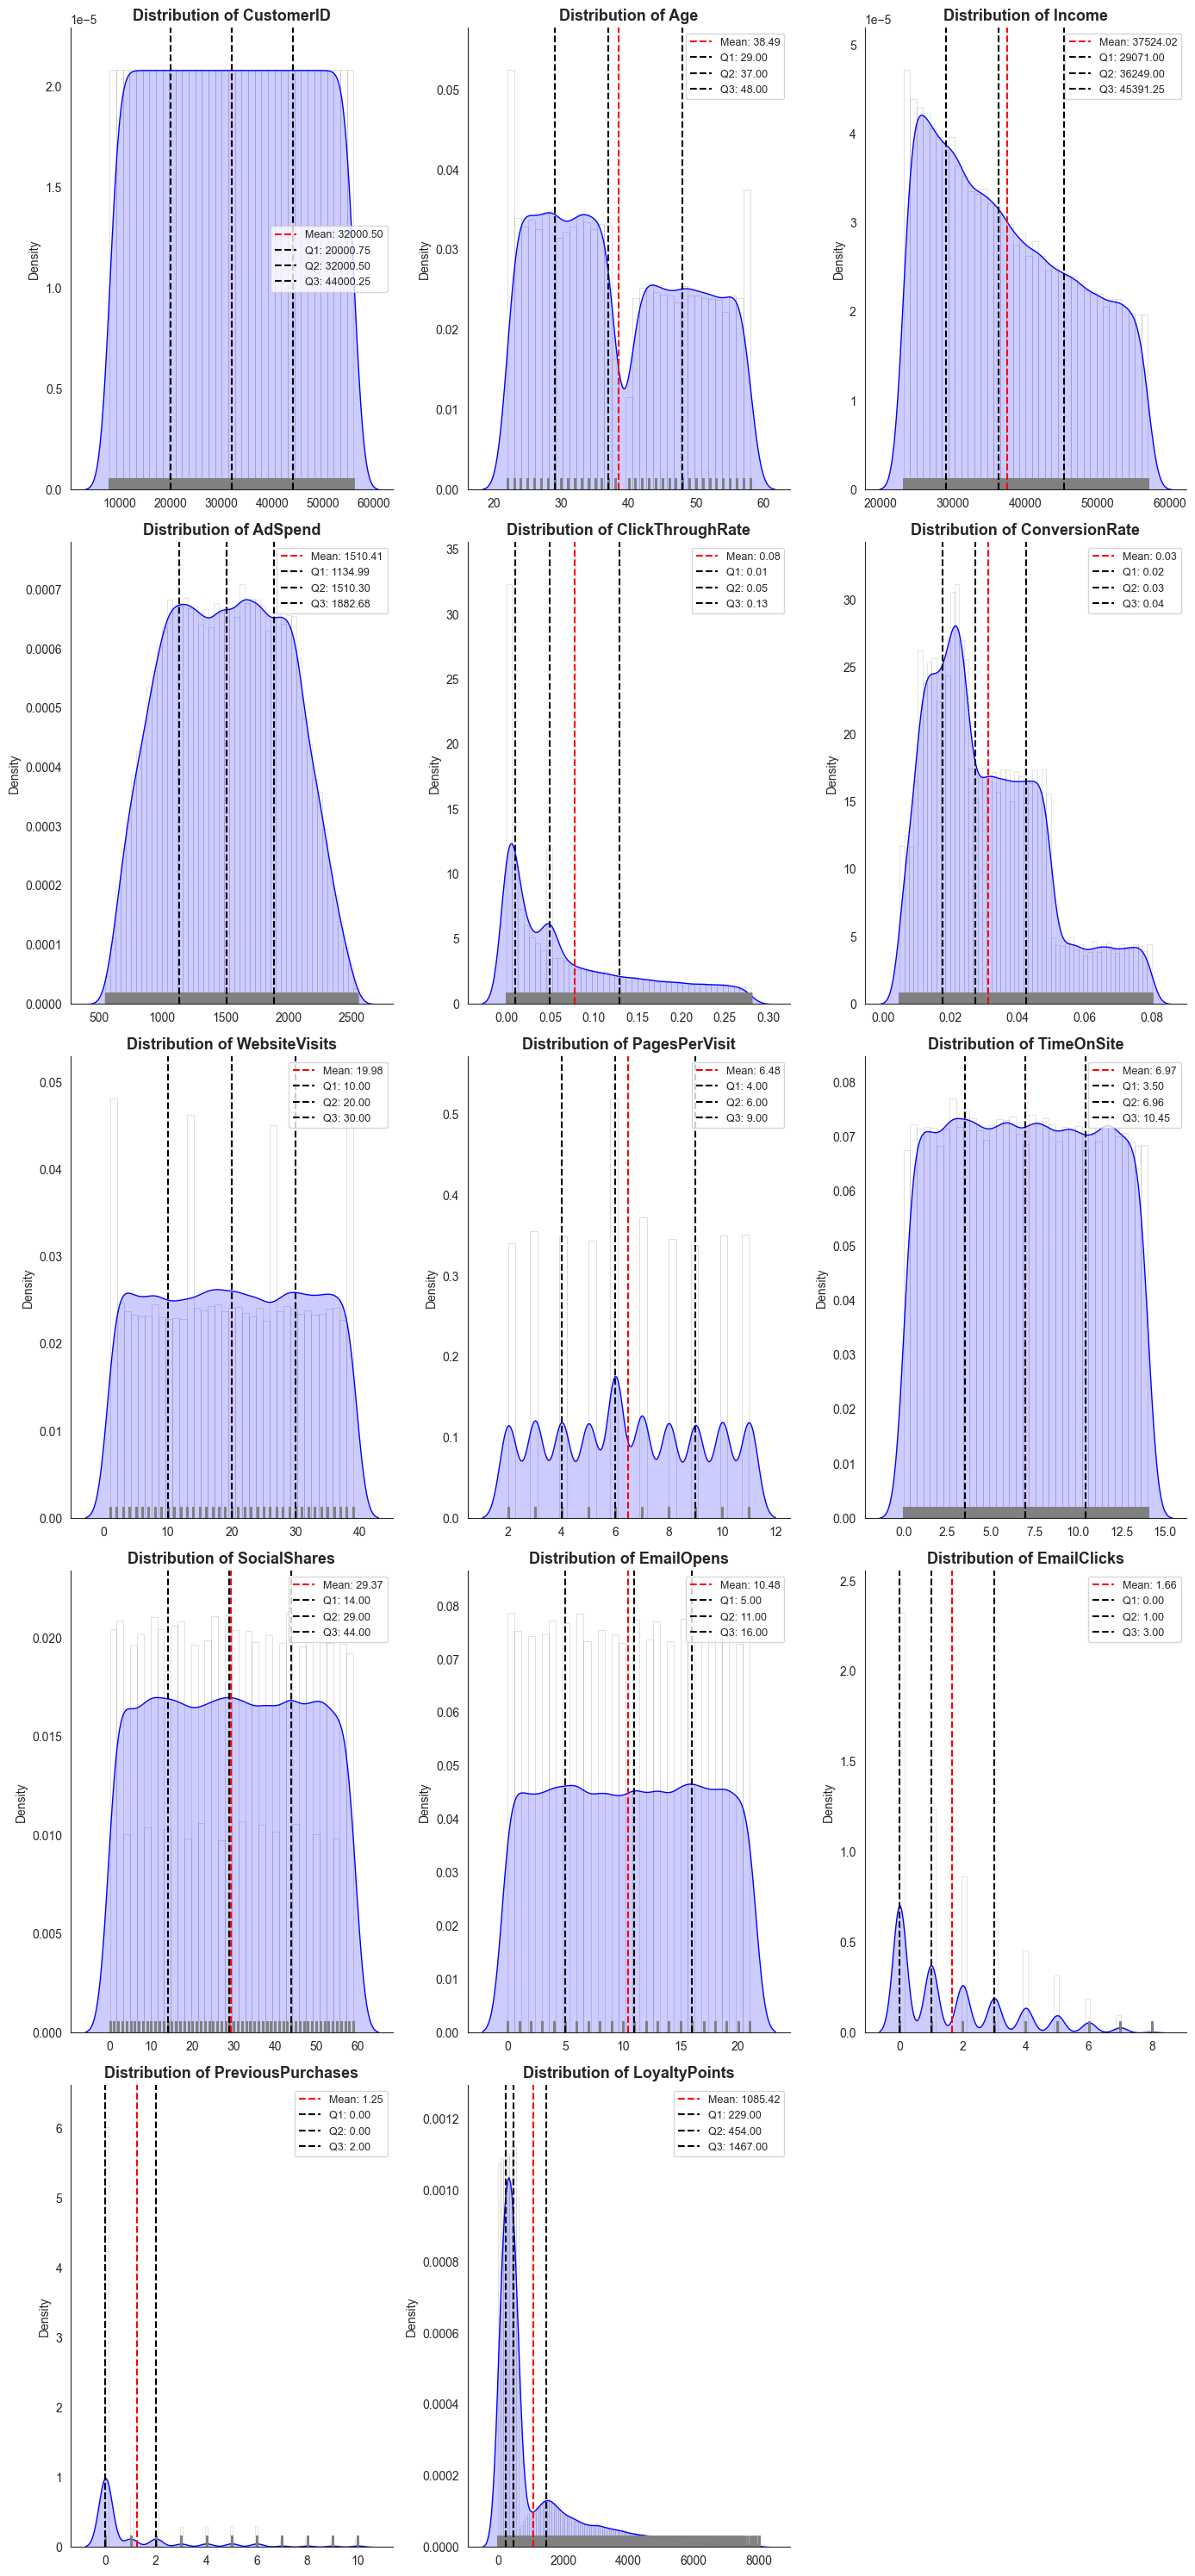

In [32]:
plot_quantile_distributions(data, numeric_cols)

In [33]:
def plot_categorical_pie_charts(data, categorical_columns, n_cols=3):
    """Kategorik değişkenlerin frekans dağılımını pasta grafiği ile görselleştirir.

    Args:
        data (pd.DataFrame): Analiz edilecek veri seti.
        categorical_columns (list): Görselleştirilecek kategorik sütunların listesi.
        n_cols (int): Yan yana gösterilecek grafik sayısı. Varsayılan: 3.
    """
    # 1. Satır sayısını hesapla
    n_rows = (len(categorical_columns) + n_cols - 1) // n_cols

    # 2. Şekil ve renk paleti oluştur
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6 * n_rows))
    fig.patch.set_facecolor('white')
    axes = axes.flatten()

    # Profesyonel renk paleti
    colors = sns.color_palette("pastel")

    for i, col in enumerate(categorical_columns):
        ax = axes[i]

        # Frekansları hesapla
        counts = data[col].value_counts()

        # Pasta grafiğini çiz
        # autopct: Yüzdeleri formatlar (%1.1f%% -> 12.5% gibi)
        # startangle: Grafiği 90 dereceden başlatır (estetik için)
        # pctdistance: Yüzde yazılarının merkeze uzaklığı
        ax.pie(counts,
               labels=counts.index,
               autopct='%1.1f%%',
               startangle=140,
               colors=colors,
               wedgeprops={'edgecolor': 'white', 'linewidth': 2}, # Dilim aralarına beyaz çizgi
               textprops={'fontsize': 10})

        ax.set_title(f"{col} Distribution", fontsize=13, fontweight='bold', pad=20)

    # Boş kalan subplot'ları temizle
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

# Kullanım:
# cat_features = ["CampaignType", "AdvertisingPlatform", "AdvertisingTool", "Conversion"]
# plot_categorical_pie_charts(data, cat_features)

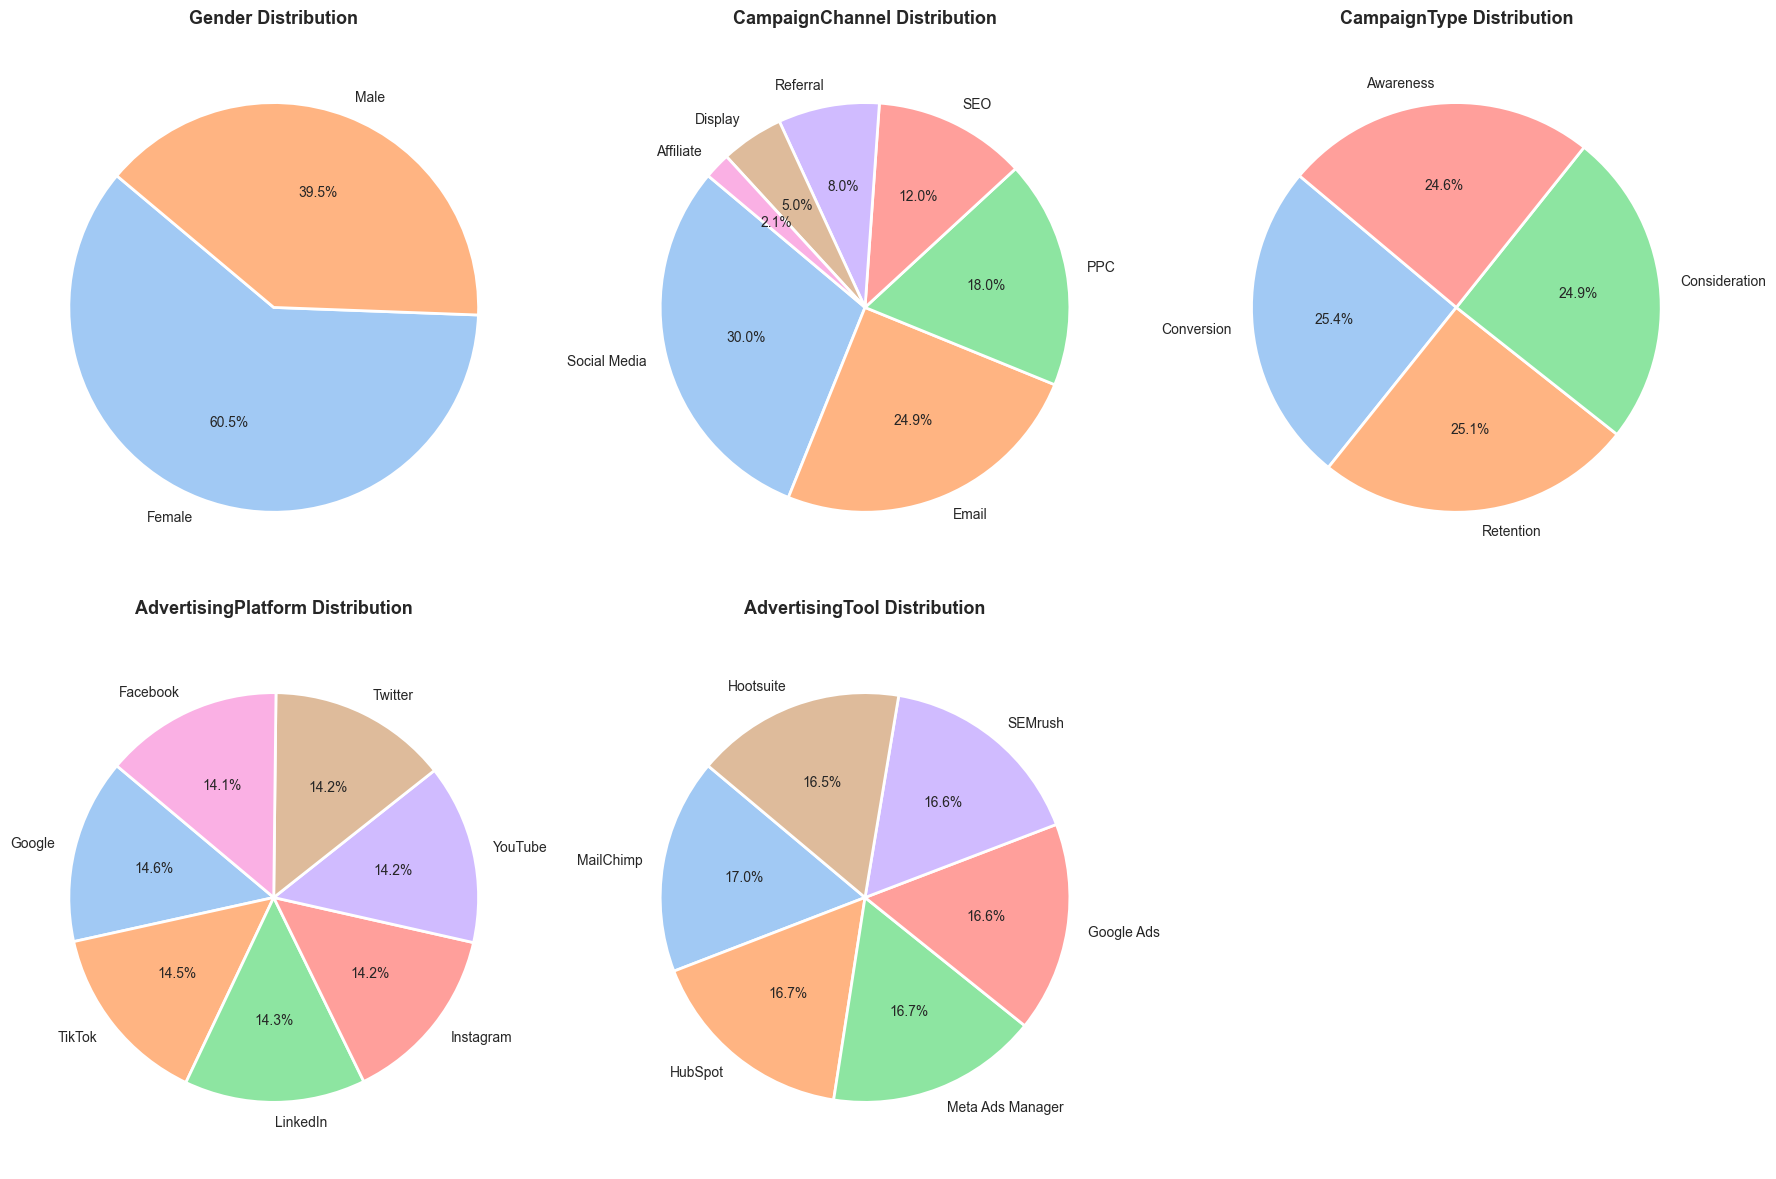

In [34]:
plot_categorical_pie_charts(data,categorical_vars)

In [35]:
numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()


#### Multicollinearity tespiti: İki feature yüksek korelasyonlu mu?

In [36]:
correlation_matrix = data[numeric_cols].corr()

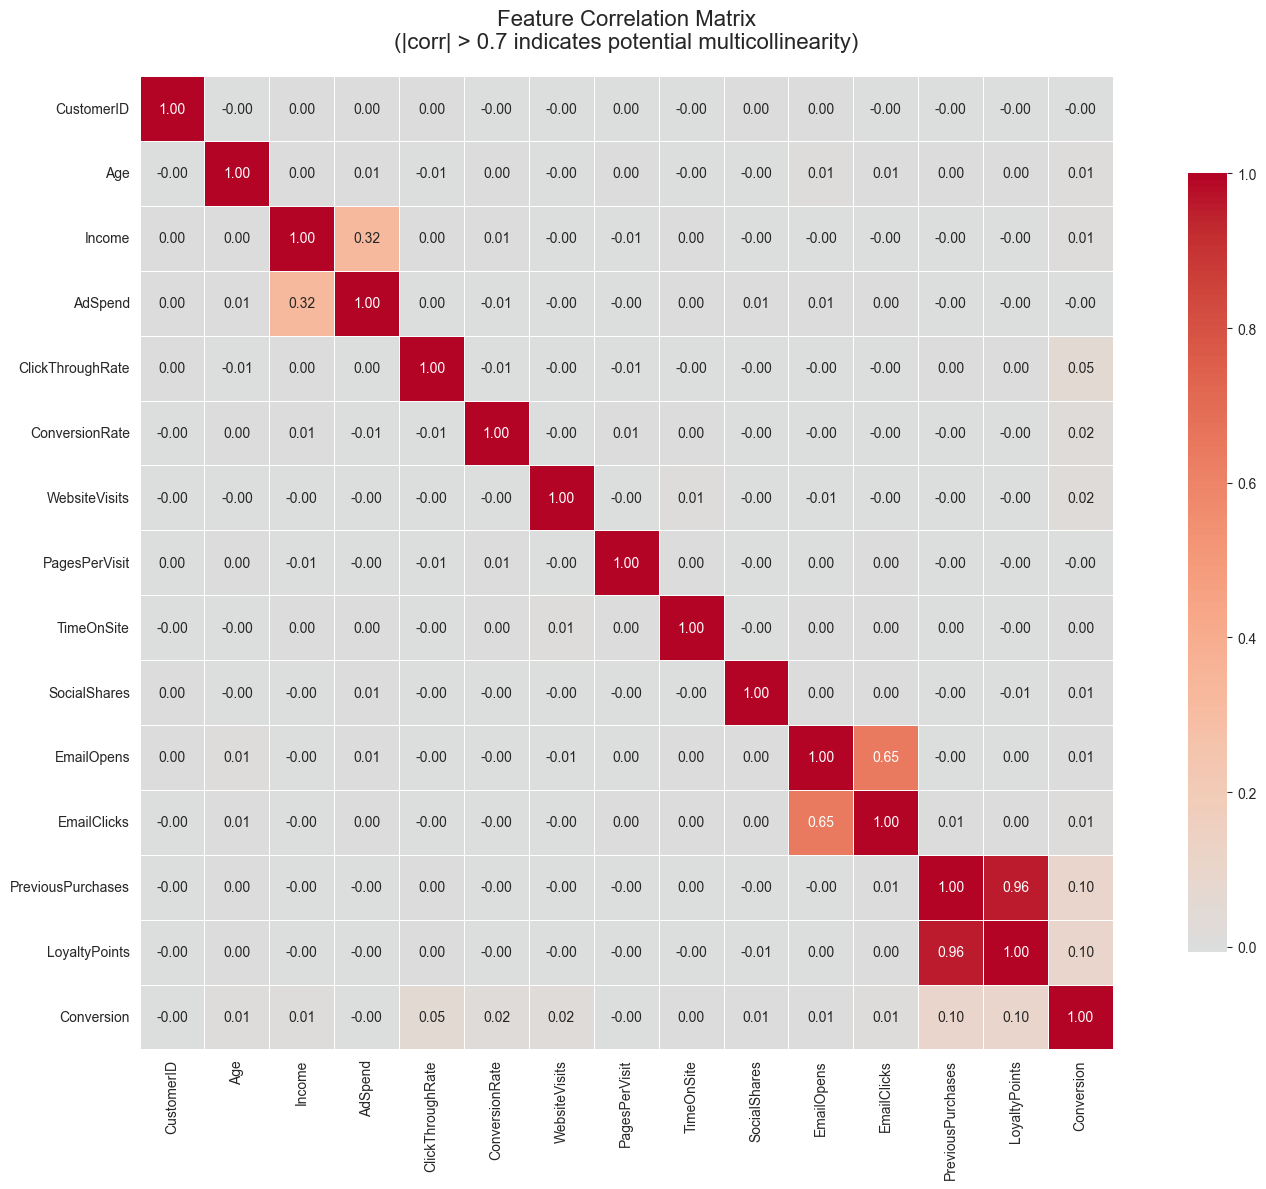

In [37]:
# Visualization
plt.figure(figsize=(16, 12))
sns.heatmap(
    correlation_matrix,
    annot=True,           # Sayıları göster
    fmt='.2f',            # 2 ondalık basamak
    cmap='coolwarm',      # Mavi=negatif, Kırmızı=pozitif
    center=0,             # 0'da ortala (daha iyi görselleşme)
    square=True,          # Kare hücreler
    linewidths=0.5,       # Hücreler arası çizgi
    cbar_kws={"shrink": 0.8}
)
plt.title('Feature Correlation Matrix\n(|corr| > 0.7 indicates potential multicollinearity)',
          fontsize=16, pad=20)
plt.tight_layout()
plt.show()

In [38]:
print("\n🔍 HIGH CORRELATION PAIRS (Potential Multicollinearity):")
print("=" * 70)

high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):  # i+1 → kendisiyle korelasyonu alma
        if abs(correlation_matrix.iloc[i, j]) > 0.7:  # Threshold: 0.7
            high_corr_pairs.append({
                'Feature 1': correlation_matrix.columns[i],
                'Feature 2': correlation_matrix.columns[j],
                'Correlation': correlation_matrix.iloc[i, j]
            })

if high_corr_pairs:
    high_corr_df = pd.DataFrame(high_corr_pairs).sort_values('Correlation',
                                                               key=abs,
                                                               ascending=False)
    print(high_corr_df.to_string(index=False))
else:
    print("✅ No high correlation (>0.7) found. Good for modeling!")




🔍 HIGH CORRELATION PAIRS (Potential Multicollinearity):
        Feature 1     Feature 2  Correlation
PreviousPurchases LoyaltyPoints     0.960188



**ACTION:** Feature engineering'de bu feature'lardan birini drop edebiliriz veya PCA ile dimensionality reduction yapabiliriz.

#### **CLASS IMBALANCE DEEP DIVE (SINIF DENGESİZLİĞİ ANALİZİ)**

**NEDEN GEREKLİ?**
- Imbalanced data: Target variable'da bir sınıf çok fazla, diğeri çok az
  → Model "hep çoğunluk sınıfını tahmin et" stratejisi izleyebilir
  → Accuracy yüksek görünür ama hiç minority class'ı yakalayamaz!

**ÇÖZÜMLER:**
1. SMOTE (Synthetic Minority Over-sampling): Azınlık sınıfını çoğalt
2. Class Weights: Model'e "Conversion=1'i daha önemli say" de
3. Threshold Optimization: 0.5 yerine optimal threshold bul (ROC curve)
4. Different Metrics: Accuracy yerine F1-Score, Precision, Recall kullan

In [39]:
conversion_counts = data['Conversion'].value_counts()
conversion_percentages = data['Conversion'].value_counts(normalize=True) * 100

print("\n📊 CLASS DISTRIBUTION ANALYSIS:")
print("=" * 70)
print(f"{'Class':<15} {'Count':<15} {'Percentage':<15}")
print("-" * 70)
for class_val in [0, 1]:
    print(f"{class_val:<15} {conversion_counts[class_val]:<15} {conversion_percentages[class_val]:.2f}%")

# Imbalance Ratio hesapla
imbalance_ratio = conversion_counts[0] / conversion_counts[1]
print(f"\n⚖️ Imbalance Ratio: {imbalance_ratio:.2f}:1")
print(f"   (Majority class {imbalance_ratio:.0f}x more than minority class)")



📊 CLASS DISTRIBUTION ANALYSIS:
Class           Count           Percentage     
----------------------------------------------------------------------
0               47020           97.96%
1               980             2.04%

⚖️ Imbalance Ratio: 47.98:1
   (Majority class 48x more than minority class)


In [40]:
# Interpretation
if imbalance_ratio > 10:
    print("\n🚨 SEVERE IMBALANCE DETECTED!")
    print("   Recommended Actions:")
    print("   1. Use SMOTE or ADASYN for oversampling")
    print("   2. Apply class_weight='balanced' in models")
    print("   3. Use Stratified K-Fold for cross-validation")
    print("   4. Evaluate with F1-Score, PR-AUC instead of Accuracy")
elif imbalance_ratio > 3:
    print("\n⚠️ MODERATE IMBALANCE detected.")
    print("   Consider using class weights or stratified sampling.")
else:
    print("\n✅ Relatively balanced dataset.")



🚨 SEVERE IMBALANCE DETECTED!
   Recommended Actions:
   1. Use SMOTE or ADASYN for oversampling
   2. Apply class_weight='balanced' in models
   3. Use Stratified K-Fold for cross-validation
   4. Evaluate with F1-Score, PR-AUC instead of Accuracy


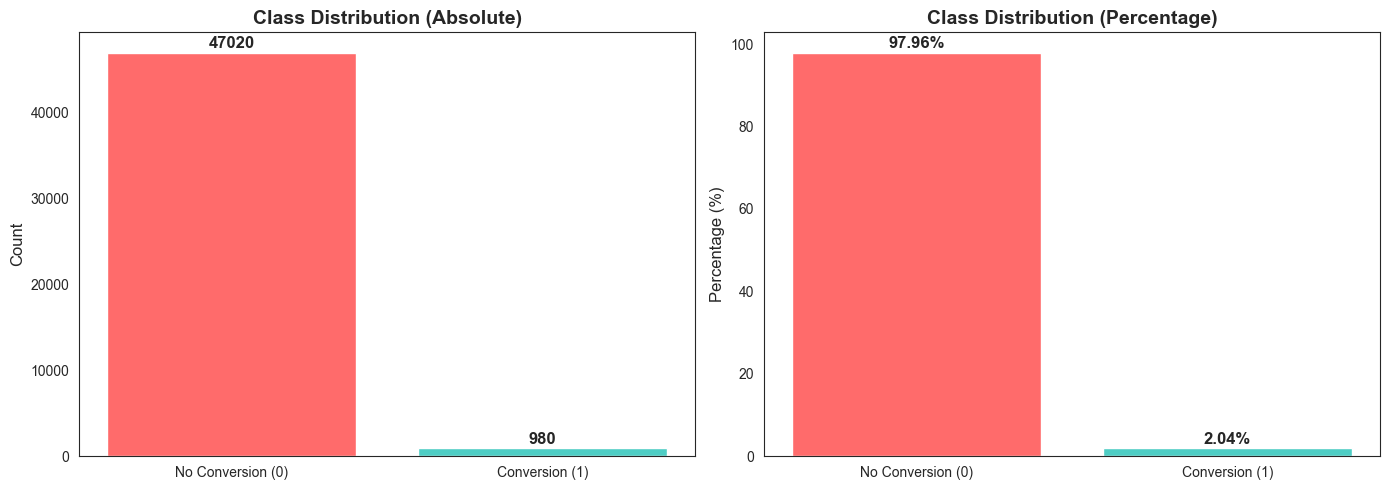

In [41]:
# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
axes[0].bar(['No Conversion (0)', 'Conversion (1)'],
            conversion_counts.values,
            color=['#FF6B6B', '#4ECDC4'])
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_title('Class Distribution (Absolute)', fontsize=14, fontweight='bold')
for i, v in enumerate(conversion_counts.values):
    axes[0].text(i, v + 500, str(v), ha='center', fontsize=12, fontweight='bold')

# Percentage plot
axes[1].bar(['No Conversion (0)', 'Conversion (1)'],
            conversion_percentages.values,
            color=['#FF6B6B', '#4ECDC4'])
axes[1].set_ylabel('Percentage (%)', fontsize=12)
axes[1].set_title('Class Distribution (Percentage)', fontsize=14, fontweight='bold')
for i, v in enumerate(conversion_percentages.values):
    axes[1].text(i, v + 1, f'{v:.2f}%', ha='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()


#### **CHI-SQUARE TEST (KATEGORİK DEĞİŞKENLER İÇİN)**
**NEDEN GEREKLİ?**
- İki kategorik değişken arasında anlamlı ilişki var mı?
- p-value 0.05 olarak seçilir. (güven seviyesi)

**NEDEN 0.05?**
- Industry standard (alpha level)
- %95 confidence level demek
- Alternatifler: 0.01 (daha katı), 0.10 (daha esnek)

In [42]:
from scipy.stats import chi2_contingency
print("\n CHI-SQUARE TESTS (Categorical Variables vs Conversion):")
print("=" * 70)

chi_square_results = []

for var in categorical_vars:
    # Contingency table oluştur (cross-tabulation)
    contingency_table = pd.crosstab(data[var], data['Conversion'])

    # Chi-square test
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

    # Sonuçları kaydet
    chi_square_results.append({
        'Variable': var,
        'Chi2 Statistic': chi2_stat,
        'P-Value': p_value,
        'Significant (α=0.05)': 'YES ✅' if p_value < 0.05 else 'NO ❌'
    })

    # Her variable için conversion rate'leri göster
    print(f"\n📌 {var}:")
    print(f"   Chi2 = {chi2_stat:.4f}, p-value = {p_value:.4e}")

    if p_value < 0.05:
        print(f"   ✅ SIGNIFICANT: {var} ile Conversion arasında anlamlı ilişki VAR!")

        # Her kategoride conversion rate'i hesapla
        conv_rates = data.groupby(var)['Conversion'].mean() * 100
        print(f"   Conversion Rates by {var}:")
        for cat, rate in conv_rates.items():
            print(f"      • {cat}: {rate:.2f}%")
    else:
        print(f"   ❌ NOT SIGNIFICANT: {var} ile Conversion arasında anlamlı ilişki YOK.")



 CHI-SQUARE TESTS (Categorical Variables vs Conversion):

📌 Gender:
   Chi2 = 3.7621, p-value = 5.2425e-02
   ❌ NOT SIGNIFICANT: Gender ile Conversion arasında anlamlı ilişki YOK.

📌 CampaignChannel:
   Chi2 = 23.0163, p-value = 7.9102e-04
   ✅ SIGNIFICANT: CampaignChannel ile Conversion arasında anlamlı ilişki VAR!
   Conversion Rates by CampaignChannel:
      • Affiliate: 1.41%
      • Display: 2.35%
      • Email: 2.38%
      • PPC: 1.97%
      • Referral: 2.43%
      • SEO: 1.49%
      • Social Media: 1.92%

📌 CampaignType:
   Chi2 = 32.0628, p-value = 5.0764e-07
   ✅ SIGNIFICANT: CampaignType ile Conversion arasında anlamlı ilişki VAR!
   Conversion Rates by CampaignType:
      • Awareness: 1.56%
      • Consideration: 2.01%
      • Conversion: 2.59%
      • Retention: 2.00%

📌 AdvertisingPlatform:
   Chi2 = 5.1959, p-value = 5.1894e-01
   ❌ NOT SIGNIFICANT: AdvertisingPlatform ile Conversion arasında anlamlı ilişki YOK.

📌 AdvertisingTool:
   Chi2 = 6.6699, p-value = 2.4637e-01


In [43]:
# Summary table
print("\n📋 CHI-SQUARE TEST SUMMARY:")
chi_df = pd.DataFrame(chi_square_results)
print(chi_df.to_string(index=False))


📋 CHI-SQUARE TEST SUMMARY:
           Variable  Chi2 Statistic      P-Value Significant (α=0.05)
             Gender        3.762146 5.242524e-02                 NO ❌
    CampaignChannel       23.016349 7.910215e-04                YES ✅
       CampaignType       32.062772 5.076446e-07                YES ✅
AdvertisingPlatform        5.195898 5.189445e-01                 NO ❌
    AdvertisingTool        6.669947 2.463664e-01                 NO ❌


#### **T-TEST (NUMERİK DEĞİŞKENLER İÇİN)**
**NEDEN GEREKLİ?**
- İki grup arasında ortalama farkı var mı?

ÖRNEK SORU:
  "Convert olan müşterilerin yaşı, convert olmayanlardan farklı mı?"

ASSUMPTIONS (Varsayımlar):
1. Normality: Veri normal dağılıma yakın olmalı
2. Equal variance: İki grubun varyansı yakın olmalı
3. Independence: Gözlemler bağımsız olmalı


In [44]:
from scipy.stats import ttest_ind, mannwhitneyu

print("\n T-TESTS (Numeric Variables vs Conversion):")
print("=" * 70)

# Test edilecek numeric variables
numeric_vars_for_test = ['Age', 'Income', 'AdSpend', 'ClickThroughRate',
                          'WebsiteVisits', 'TimeOnSite', 'PreviousPurchases']

t_test_results = []

for var in numeric_vars_for_test:
    # İki grubu ayır
    group_0 = data[data['Conversion'] == 0][var].dropna()  # No Conversion
    group_1 = data[data['Conversion'] == 1][var].dropna()  # Conversion

    # T-test (two-tailed, independent samples)
    t_stat, p_value = ttest_ind(group_0, group_1)

    # Ortalama ve standart sapmaları hesapla
    mean_0 = group_0.mean()
    mean_1 = group_1.mean()
    diff_pct = ((mean_1 - mean_0) / mean_0) * 100 if mean_0 != 0 else 0

    # Sonuçları kaydet
    t_test_results.append({
        'Variable': var,
        'Mean (No Conv)': mean_0,
        'Mean (Conv)': mean_1,
        'Difference (%)': diff_pct,
        'P-Value': p_value,
        'Significant': 'YES ✅' if p_value < 0.05 else 'NO ❌'
    })

    print(f"\n📌 {var}:")
    print(f"   No Conversion: μ = {mean_0:.2f}")
    print(f"   Conversion:    μ = {mean_1:.2f}")
    print(f"   Difference: {diff_pct:+.2f}%")
    print(f"   p-value = {p_value:.4e}")

    if p_value < 0.05:
        print(f"   ✅ SIGNIFICANT: Convert olan müşterilerde {var} anlamlı derecede farklı!")
    else:
        print(f"   ❌ NOT SIGNIFICANT: {var}'de anlamlı fark yok.")



 T-TESTS (Numeric Variables vs Conversion):

📌 Age:
   No Conversion: μ = 38.47
   Conversion:    μ = 39.53
   Difference: +2.76%
   p-value = 2.0424e-03
   ✅ SIGNIFICANT: Convert olan müşterilerde Age anlamlı derecede farklı!

📌 Income:
   No Conversion: μ = 37505.23
   Conversion:    μ = 38425.48
   Difference: +2.45%
   p-value = 3.1613e-03
   ✅ SIGNIFICANT: Convert olan müşterilerde Income anlamlı derecede farklı!

📌 AdSpend:
   No Conversion: μ = 1510.67
   Conversion:    μ = 1498.05
   Difference: -0.83%
   p-value = 3.9244e-01
   ❌ NOT SIGNIFICANT: AdSpend'de anlamlı fark yok.

📌 ClickThroughRate:
   No Conversion: μ = 0.08
   Conversion:    μ = 0.11
   Difference: +37.45%
   p-value = 9.4213e-30
   ✅ SIGNIFICANT: Convert olan müşterilerde ClickThroughRate anlamlı derecede farklı!

📌 WebsiteVisits:
   No Conversion: μ = 19.95
   Conversion:    μ = 21.29
   Difference: +6.73%
   p-value = 2.2434e-04
   ✅ SIGNIFICANT: Convert olan müşterilerde WebsiteVisits anlamlı derecede farkl

In [45]:
print("\n📋 T-TEST SUMMARY:")
t_df = pd.DataFrame(t_test_results)
print(t_df.to_string(index=False))


📋 T-TEST SUMMARY:
         Variable  Mean (No Conv)  Mean (Conv)  Difference (%)       P-Value Significant
              Age       38.472650    39.533673        2.757864  2.042414e-03       YES ✅
           Income    37505.227456 38425.475510        2.453653  3.161278e-03       YES ✅
          AdSpend     1510.665286  1498.051388       -0.834990  3.924441e-01        NO ❌
 ClickThroughRate        0.077579     0.106632       37.448569  9.421294e-30       YES ✅
    WebsiteVisits       19.951850    21.293878        6.726330  2.243413e-04       YES ✅
       TimeOnSite        6.970586     7.089112        1.700381  3.610620e-01        NO ❌
PreviousPurchases        1.211931     2.833673      133.814735 1.905797e-106       YES ✅


T-TEST vs CHI-SQUARE?
- T-test: Numeric variables için (Age, Income, AdSpend)
- Chi-square: Categorical variables için (Gender, Channel)

#### **CHANNEL-WISE CONVERSION ANALYSIS**

**NEDEN GEREKLİ?**
- Hangi marketing channel en etkili?
- Para nereden daha iyi dönüyor?

**BU ANALİZ NE SAĞLAR?**
1. Channel Performance Comparison
2. Budget allocation insights (hangi channel'a daha fazla yatırım?)
3. ROI optimization stratejisi

**METRIKLER**:
_Conversion Rate_: Dönüşüm oranı
_Average AdSpend_: Ortalama harcama
_CPA (Cost Per Acquisition)_: Her conversion için maliyet

  → CPA = Total AdSpend / Total Conversions

  → Düşük CPA = Daha verimli channel



In [46]:
print("\n📊 CHANNEL-WISE CONVERSION ANALYSIS:")
print("=" * 70)

# Her channel için metrikleri hesapla
channel_analysis = data.groupby('CampaignChannel').agg({
    'Conversion': ['sum', 'mean'],  # Total conversions & conversion rate
    'AdSpend': ['sum', 'mean'],     # Total & average spend
    'CustomerID': 'count'           # Total customers
}).round(4)

# Column names'i flatten et
channel_analysis.columns = ['Total_Conversions', 'Conversion_Rate',
                             'Total_AdSpend', 'Avg_AdSpend', 'Total_Customers']

# CPA (Cost Per Acquisition) hesapla
# CPA = Total AdSpend / Total Conversions
# Eğer conversion=0 ise CPA=inf (hiç dönüşüm olmamış)
channel_analysis['CPA'] = channel_analysis['Total_AdSpend'] / channel_analysis['Total_Conversions']
channel_analysis['CPA'] = channel_analysis['CPA'].replace([np.inf, -np.inf], np.nan)

# Conversion rate'i percentage olarak göster
channel_analysis['Conversion_Rate_Pct'] = channel_analysis['Conversion_Rate'] * 100

# Sort by Conversion Rate (descending)
channel_analysis = channel_analysis.sort_values('Conversion_Rate', ascending=False)

print(channel_analysis)


📊 CHANNEL-WISE CONVERSION ANALYSIS:
                 Total_Conversions  Conversion_Rate  Total_AdSpend  \
CampaignChannel                                                      
Referral                        93           0.0243     5776906.96   
Email                          285           0.0238    18101197.49   
Display                         56           0.0235     3593182.84   
PPC                            170           0.0197    12994100.44   
Social Media                   276           0.0192    21839223.99   
SEO                             86           0.0149     8719719.52   
Affiliate                       14           0.0141     1475240.86   

                 Avg_AdSpend  Total_Customers            CPA  \
CampaignChannel                                                
Referral           1506.7572             3834   62117.279140   
Email              1511.8348            11973   63512.973649   
Display            1511.0104             2378   64163.979286   
PPC         

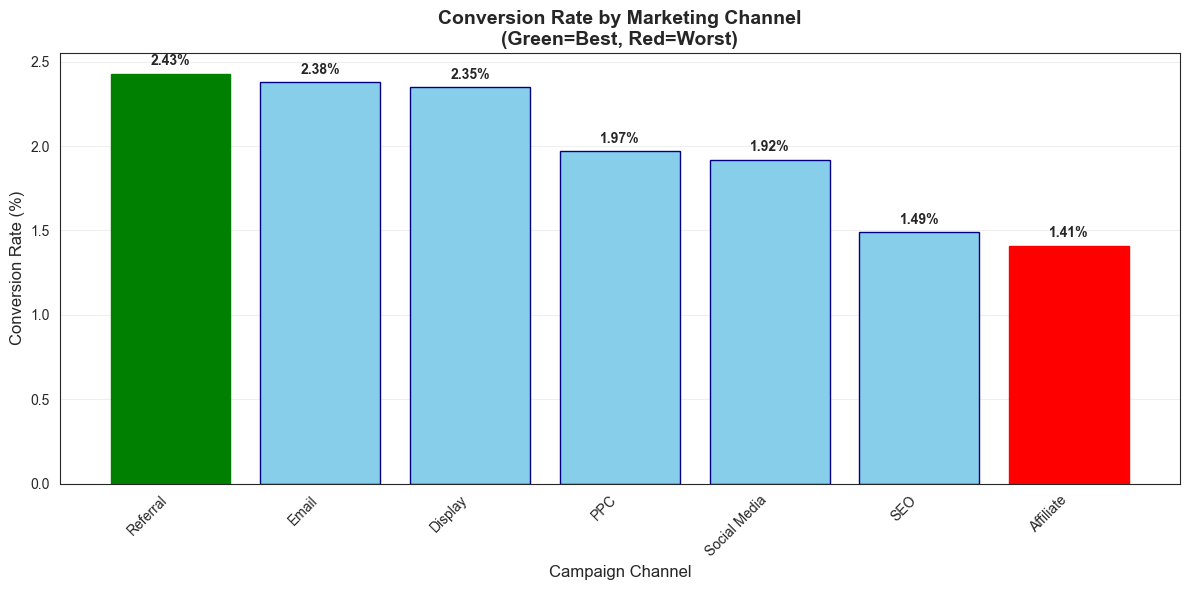

In [47]:
# Visualization: Conversion Rate by Channel
plt.figure(figsize=(12, 6))
channels = channel_analysis.index
conv_rates = channel_analysis['Conversion_Rate_Pct']

bars = plt.bar(channels, conv_rates, color='skyblue', edgecolor='navy')

# En yüksek ve en düşük bar'ları highlight et
max_idx = conv_rates.argmax()
min_idx = conv_rates.argmin()
bars[max_idx].set_color('green')
bars[min_idx].set_color('red')

plt.xlabel('Campaign Channel', fontsize=12)
plt.ylabel('Conversion Rate (%)', fontsize=12)
plt.title('Conversion Rate by Marketing Channel\n(Green=Best, Red=Worst)',
          fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Bar'ların üstüne değerleri yaz
for i, (channel, rate) in enumerate(zip(channels, conv_rates)):
    plt.text(i, rate + 0.05, f'{rate:.2f}%', ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


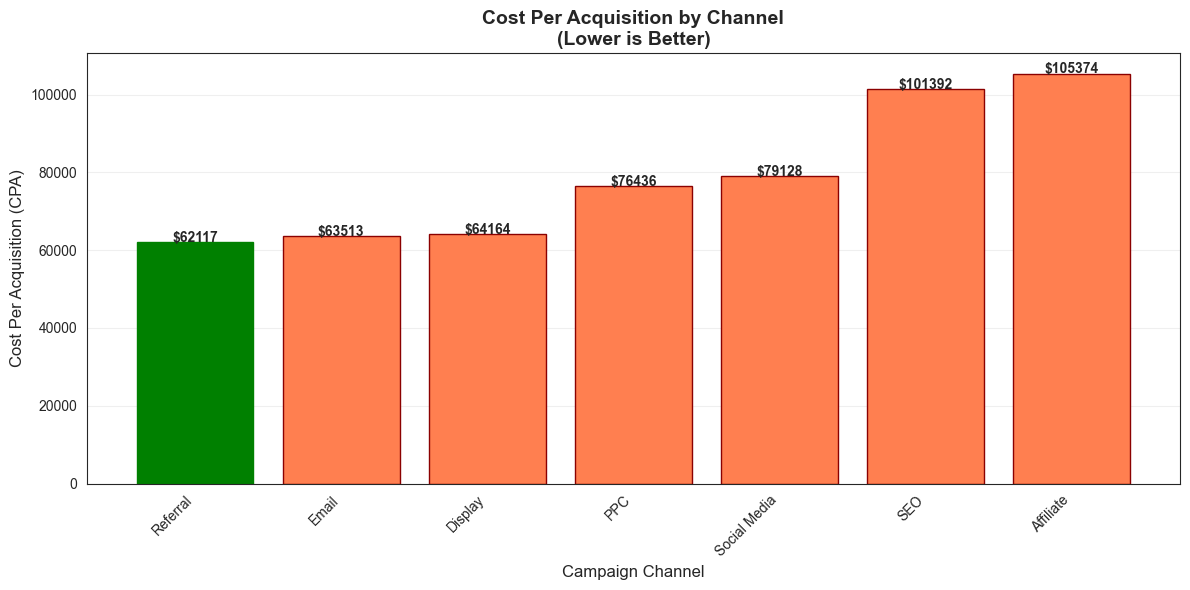

In [48]:
# CPA Visualization (sadece valid CPA'lar için)
valid_cpa = channel_analysis[channel_analysis['CPA'].notna()]
if len(valid_cpa) > 0:
    plt.figure(figsize=(12, 6))
    channels_cpa = valid_cpa.index
    cpa_values = valid_cpa['CPA']

    bars = plt.bar(channels_cpa, cpa_values, color='coral', edgecolor='darkred')

    # En düşük CPA'yı highlight et (best efficiency)
    min_cpa_idx = cpa_values.argmin()
    bars[min_cpa_idx].set_color('green')

    plt.xlabel('Campaign Channel', fontsize=12)
    plt.ylabel('Cost Per Acquisition (CPA)', fontsize=12)
    plt.title('Cost Per Acquisition by Channel\n(Lower is Better)',
              fontsize=14, fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3)

    for i, (channel, cpa) in enumerate(zip(channels_cpa, cpa_values)):
        plt.text(i, cpa + 50, f'${cpa:.0f}', ha='center', fontsize=10, fontweight='bold')

    plt.tight_layout()
    plt.show()


In [49]:
# =============================================================================
# SON CELL: TEMİZLENMİŞ VERİYİ KAYDET
# =============================================================================

print("\n" + "="*70)
print(" SAVING CLEANED DATA")
print("="*70)

# Temizlenmiş veriyi kaydet
output_path = '../data/marketing_analytics_cleaned.csv'
data.to_csv(output_path, index=False)

print(f"\n✅ Cleaned data saved to: {output_path}")
print(f"   Shape: {data.shape}")
print(f"   Missing values handled: ✅")
print(f"   Outliers detected: ✅")
print(f"   Ready for Feature Engineering!")


 SAVING CLEANED DATA

✅ Cleaned data saved to: ../data/marketing_analytics_cleaned.csv
   Shape: (48000, 20)
   Missing values handled: ✅
   Outliers detected: ✅
   Ready for Feature Engineering!
